In [14]:
# importing libraries & tools

import selenium
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [63]:
# opening the chromedriver by automation
driver = webdriver.Chrome('chromedriver.exe')

In [26]:
# opening e-commerce website 
url = 'https://www.amazon.in/'   # defining url of e-commerce website into a variable
driver.get(url)                  # opening url in chromedriver

# defining the list of products from which we have to scrap the Ratings and Reviews
search_list = ['Laptops', 'Phones', 'Headphons', 'Smartwatches', 'Professional Cameras', 'Printers',
               'Monitors', 'Home Theatres', 'Routers']

product_links = []              # empty list for each product links


# for loop, for searching each product on the website one by one.
for i in search_list:
    search_bar = driver.find_element_by_id('twotabsearchtextbox')      # location path for search bar
    search_bar.clear()                                                 # clearing the pre-written search object
    search_bar.send_keys(i)                                            # sending the new key in search bar
    
    search_btn = driver.find_element_by_id('nav-search-submit-button') # locatin path for search button
    search_btn.click()                                                 # clicking on search button
    time.sleep(3)                                                     # holding next process for 3 seconds to load website fully

# for loop for getting url of each product
    for i in range(3):
        # finding elements of url by xpath
        href = driver.find_elements_by_xpath('//h2[@class="a-size-mini a-spacing-none a-color-base s-line-clamp-2"]//a')
        # finding elements of next page button if any
        nxt_btn = driver.find_element_by_xpath('//li[@class="a-last"]')
        
        # for loop for extracting the url in empty list
        for i in href:
            product_links.append(i.get_attribute('href')) # getting urls in empty list
            
        # using (try and except) in case if there is no next page, we won't get error
        try:
            nxt_btn.click()  # clicking on next button of reviews and rating page if any
        except:
            break
        time.sleep(5)   # holding the process for 5 seconds

In [28]:
# getting the length of links(urls) extracted
len(product_links)

621

In [48]:
# creating empty list for Ratings and Reviews
Ratings = []
Reviews = []

# for loop for opening each url one by one
for i in product_links:
    driver.get(i)
    time.sleep(3)
    
    # using (try and except) in case there is no next review page or no reviews for any specific rating filter
    try:
        # getting the element of all reviews button of a particular product & clicking on it
        all_reviews = driver.find_element_by_xpath('//a[@class="a-link-emphasis a-text-bold"]')
        all_reviews.click()
        time.sleep(3)
    
        # getting the element of rating filter and clicking on it because we will extract reviews according to ratings
        rating_filter = driver.find_element_by_xpath('//div[@class="a-column a-span3 star-rating-select"]')
        rating_filter.click()
    
        # for loop for applying each star filter from 1 to 5 one by one
        for a in range(2,7):
            #getting elements of filter. there is other filters also which we don't want so we numbered the element which we want
            dd_filter = driver.find_element_by_xpath('//li[@class="a-dropdown-item star-filter-option"][' + str(a) +']')
            dd_filter.click()
            time.sleep(2)
            
            # appending the reviews text in empty list after finding the elements of reviews by xpath
            review_content = driver.find_elements_by_xpath('//span[@class="a-size-base review-text review-text-content"]')
            for i in review_content:
                Reviews.append(i.text)
                
                # creating (if, elif) function for appending the star for corresponding reviews, we are getting reviews based on
                # star filter so using if elif method, if reviews is fom 5 star rating filter append 5 as rating in empty list
                if (a==2):
                    rating_star = 5
                elif (a==3):
                    rating_star = 4
                elif (a==4):
                    rating_star = 3
                elif (a==5):
                    rating_star = 2
                else:
                    rating_star = 1
                Ratings.append(rating_star)
                
            try:
                nxt_btn.click()     # clicking on next page of reviews button
            except:
                pass
            rating_filter.click()   # again clicking on filter button so that for loop from filter could start again, otherwise
                                    # it won't find elements of filters and will give error
    except:
        continue
            
print(len(Reviews))

print(len(Ratings))

20810
20810


In [49]:
# printing the ratings
Ratings

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 5,
 5,
 5,
 5,
 5,


In [50]:
# printing the extracted reviews
Reviews

['Best choice for a gaming lap',
 "The laptop is light weight with not much powerful processor, but the best part is due to SSD the boot-up and shutdown time is 1-2 seconds. All the applications are working smoothly. Laptop comes with 1 Year Dell basic warranty, Genuine Windows 10 which needs to be activated, MS office 2019 student subscription and 15 Months McAfee antivirus subscription. Battery life is good and with moderate use can last upto 5 hrs. Overall a great product if you need laptop for your kid's online classes+homework and not for running Machine learning algorithms.",
 'Best product under 30k. build quility was super as i imagin with dell , good battery backup it will last up to 5-6 hour with heavy use and 7-8 hour with light or modrate ssd speed is also amazing open any application in few seconds , boot time is about 10to12 seconds ,and charging time is about 1.5 hour . i highly recommend this just go for it.',
 'It is good.i used it for normal work. I buy it when itbis 

In [66]:
# creating a data frame of data scraped and storing it in local system as csv and excel format
Data = pd.DataFrame({})
Data['Ratings'] = Ratings
Data['Reviews'] = Reviews
Data.to_csv('Amazon_ratings.csv')
Data.to_excel('Amazon_ratings.xls')
Data

,Ratings,Reviews
0,5,Best choice for a gaming lap
1,5,The laptop is light weight with not much power...
2,5,Best product under 30k. build quility was supe...
3,5,It is good.i used it for normal work. I buy it...
4,5,Value for money...in 30K range very good produ...
...,...,...
20805,1,Gives back up of hardly 2hours max.Totally aga...
20806,1,I have connected the modem back up with my WiF...
20807,1,Wrong description... As opposed to promised 5-...
20808,1,It's not working after around 6 months of usag...


In [56]:
Data['Ratings'].value_counts()

5    4854
1    4389
4    4216
3    3792
2    3559
Name: Ratings, dtype: int64

Text(0.5, 1.0, 'Distributions of Ratings')

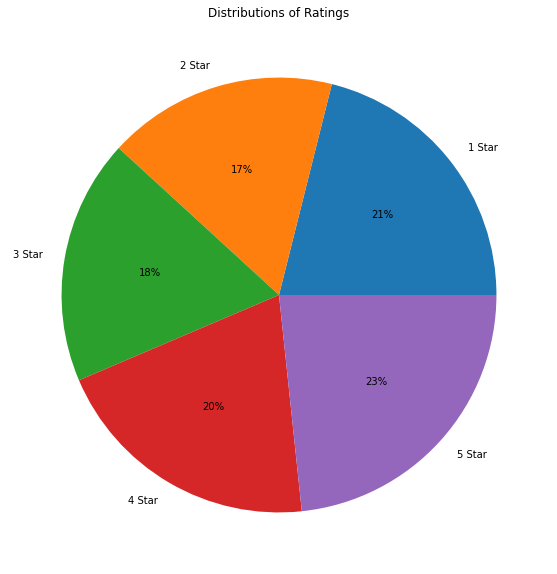

In [58]:
# plotting the distribution of the ratings in a pie chart
plt.figure(figsize = (20,10))

Values = [Data.Ratings[Data.Ratings==1].count() , Data.Ratings[Data.Ratings==2].count() , Data.Ratings[Data.Ratings==3].count(),
          Data.Ratings[Data.Ratings==4].count() , Data.Ratings[Data.Ratings==5].count()]

label = ['1 Star' , '2 Star', '3 Star', '4 Star', '5 Star']

plt.pie(Values, labels = label, autopct = '%1.0f%%')
plt.title('Distributions of Ratings')

In [64]:
driver.close()

In [65]:
Data

,Ratings,Reviews
0,5,Best choice for a gaming lap
1,5,The laptop is light weight with not much power...
2,5,Best product under 30k. build quility was supe...
3,5,It is good.i used it for normal work. I buy it...
4,5,Value for money...in 30K range very good produ...
...,...,...
20805,1,Gives back up of hardly 2hours max.Totally aga...
20806,1,I have connected the modem back up with my WiF...
20807,1,Wrong description... As opposed to promised 5-...
20808,1,It's not working after around 6 months of usag...
